In [1]:
include("../src/InfectionSim.jl")
include("../src/ODEFIT.jl")

toSIR (generic function with 1 method)

# Fit ODE Parameters to Single Simulation

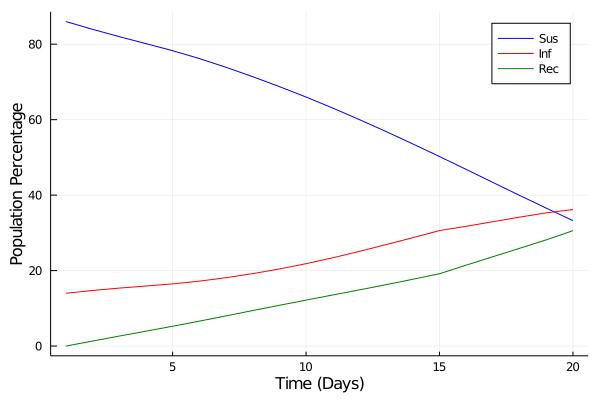

In [2]:
param = initParams(
    infections_path="../data/Sample50.csv",
    viral_loads_path="../data/raw_viral_load.csv",
    symptomatic_isolation_prob = 0.95,
    asymptomatic_prob = 0.65
)
state = initState(fill(10_000,14),param, N=1_000_000)
action = Action(0.0)
T = 20
simHist = Simulate(T, state, param, action)
plotHist(simHist)

## SIR Fit

In [3]:
res, p = FitModel(:SIR, simHist)

( * Status: success

 * Candidate solution
    Final objective value:     2.369168e-02

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    51
    f(x) calls:    95
, [0.06178616477265738, 0.1707173453732373])

In [4]:
sol = SolveODE(:SIR, initSIR(simHist), simHist.T, p);

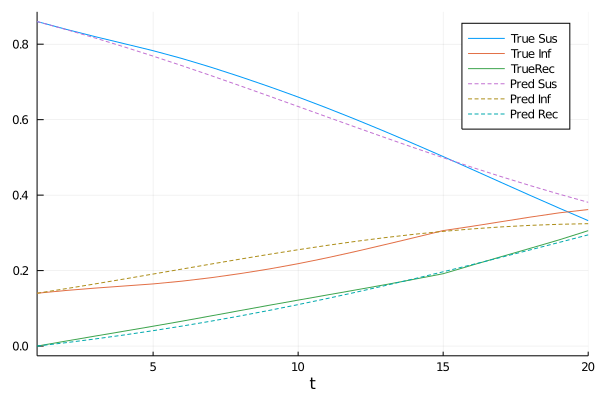

In [5]:
plot(Array(simHist)'./simHist.N, labels= ["True Sus" "True Inf" "TrueRec"])
plot!(sol, ls=:dash, label=["Pred Sus" "Pred Inf" "Pred Rec"])

## SEIR Fit

In [6]:
res, p = FitModel(:SEIR, simHist)

( * Status: success

 * Candidate solution
    Final objective value:     2.262930e-02

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    194
    f(x) calls:    340
, [0.06810146019835839, 0.18834500172272955, 1.1249053771666677])

In [7]:
sol = SolveODE(:SEIR, initSEIR(simHist), simHist.T, p);

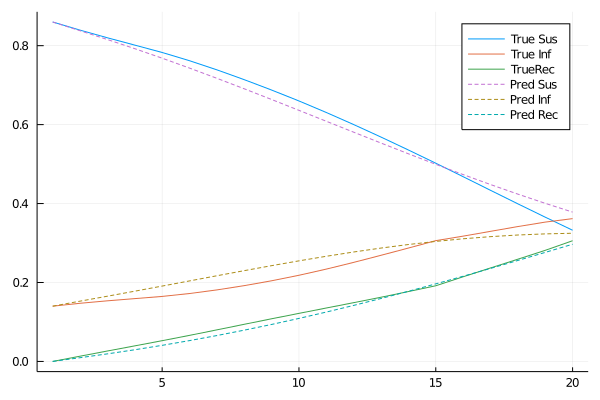

In [8]:
plot(Array(simHist)'./simHist.N, labels= ["True Sus" "True Inf" "TrueRec"])
plot_arr = sol[[1,3,4],:]
plot_arr[2,:] += sol[2,:]
plot!(plot_arr', ls=:dash, label=["Pred Sus" "Pred Inf" "Pred Rec"])

# Fit Parameters to Random Simulation Ensemble

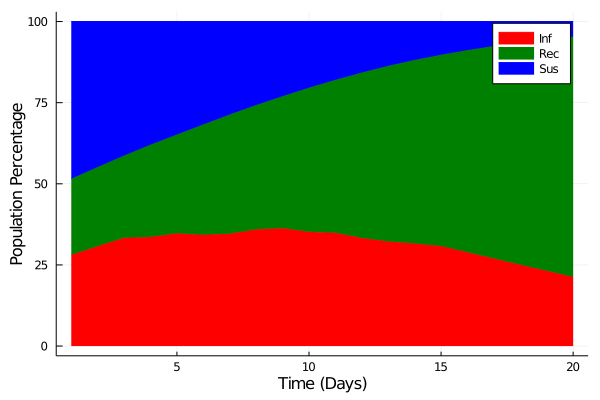

In [9]:
# Generate Data With random starting parameters
simHist = Simulate(T, initState(param), param, action)
plotHist(simHist,kind=:stack,order="IRS")

## SIR Fit

In [10]:
T = 20; # Sim Time
N = 100; # Number of Random Sims
res, p = FitRandEnsemble(:SIR, T, N, param, action)

( * Status: success

 * Candidate solution
    Final objective value:     1.025157e-01

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    30
    f(x) calls:    59
, [0.09972596396635257, 0.32016542477268806])

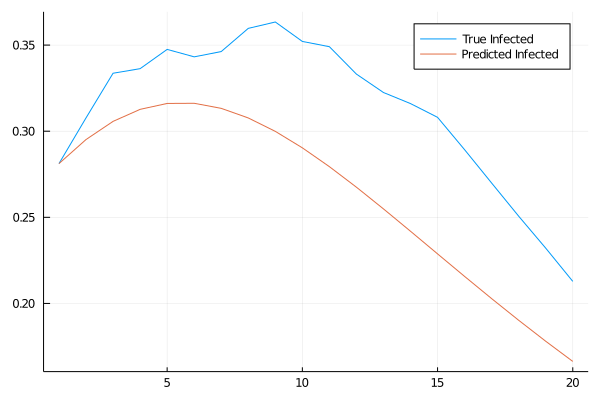

In [11]:
plot(simHist.inf./simHist.N, label= "True Infected")
sol = Array(SolveODE(:SIR,initSIR(simHist),T,p))
plot!(sol[2,:], label="Predicted Infected")

## SEIR Fit

In [12]:
T = 20; # Sim Time
N = 100; # Number of Random Sims 
res, p = FitRandEnsemble(:SEIR, T, N, param, action)

( * Status: success

 * Candidate solution
    Final objective value:     7.606587e-02

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    70
    f(x) calls:    127
, [0.12889079072778392, 0.42156764602995433, 0.18205570563090828])

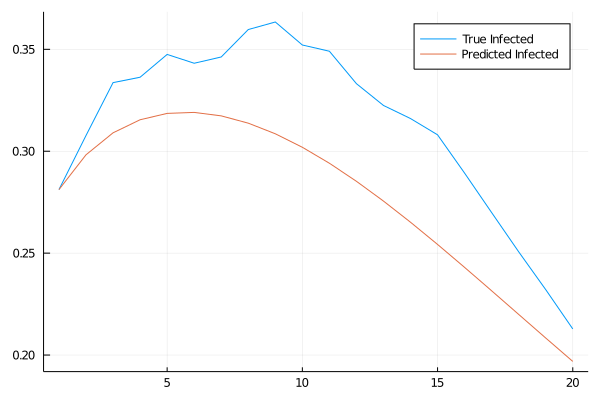

In [13]:
plot(simHist.inf./simHist.N, label="True Infected")
sol = Array(SolveODE(:SEIR,initSEIR(simHist),T,p))
plot!(sol[2,:] + sol[3,:], label="Predicted Infected")

# Controlled Fit

In [14]:
SIRres, SIRp = FitRandControlledEnsemble(:SIR, 30, 500, param, show_trace=true)

Iter     Function value    √(Σ(yᵢ-ȳ)²)/n 
------   --------------    --------------
     0     4.019185e-01     1.958017e-01
 * time: 0.04287600517272949
    50     1.355090e-01     1.795335e-07
 * time: 3.889112949371338


( * Status: success

 * Candidate solution
    Final objective value:     1.355087e-01

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   5  (vs limit Inf)
    Iterations:    62
    f(x) calls:    120
, [0.08737891651572562, 0.31515434324559255, 0.3305920101009118])

In [15]:
SEIRres, SEIRp = FitRandControlledEnsemble(:SEIR, 20, 500, param, show_trace=true)

Iter     Function value    √(Σ(yᵢ-ȳ)²)/n 
------   --------------    --------------
     0     4.087847e-01     7.497770e-02
 * time: 8.988380432128906e-5
    50     5.048652e-02     1.267703e-03
 * time: 3.1563010215759277
   100     4.901069e-02     2.947520e-05
 * time: 6.613874912261963
   150     4.891527e-02     1.933926e-07
 * time: 9.719030857086182


( * Status: success

 * Candidate solution
    Final objective value:     4.891439e-02

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   12  (vs limit Inf)
    Iterations:    177
    f(x) calls:    290
, [0.11194582835465672, 0.3795738854410371, 0.2971887939278857, 0.4266949211349589, -0.1423531608411723])

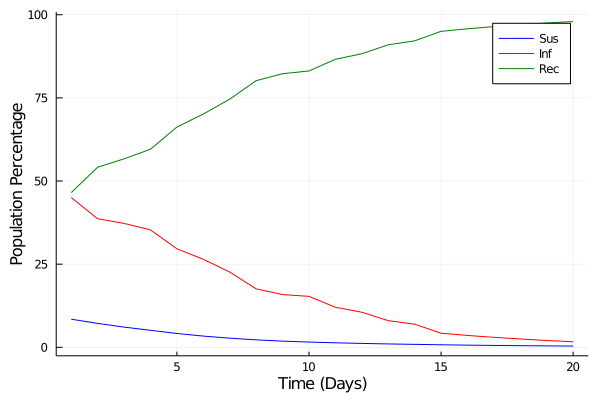

In [16]:
s = initState(param)
initstate = s
simhist = Simulate(20, initstate, param, Action(0.1))
plot(simhist)

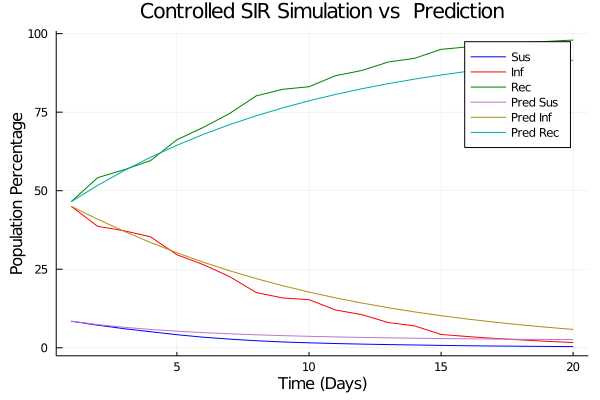

In [24]:
u0 = initSIR(simhist)
sol = SolveODE(:SIR_CTRL, vcat(u0,0.1), 20, SIRp)

plot(simhist)
plot!(toSIR(sol)'*100, labels=["Pred Sus" "Pred Inf" "Pred Rec"])
title!("Controlled SIR Simulation vs  Prediction")

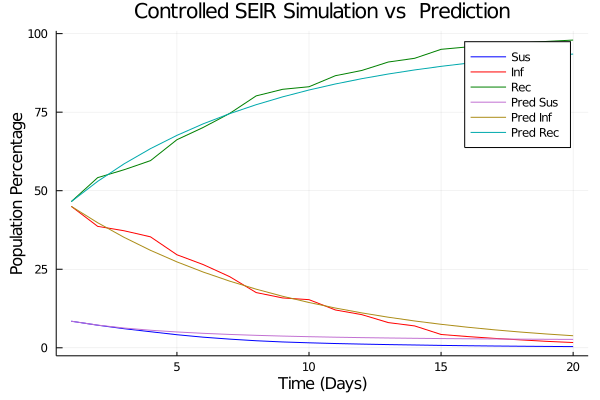

In [23]:
u0 = initSEIR(simhist)
sol = SolveODE(:SEIR_CTRL, vcat(u0,0.1), 20, SEIRp)

plot(simhist)
plot!(toSIR(sol)'*100, labels=["Pred Sus" "Pred Inf" "Pred Rec"])
title!("Controlled SEIR Simulation vs  Prediction")